# Creación y optimización de PORTAFOLIOS de inversión.

In [39]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime

In [40]:
tickers = ['AAPL', 'NKE', 'TLEVISACPO.MX', 'BIMBOA.MX']
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2024,4,1)
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = yf.download(t, start=start, end=end)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [41]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3583 entries, 2010-01-04 to 2024-03-28
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AAPL           3583 non-null   float64
 1   NKE            3583 non-null   float64
 2   TLEVISACPO.MX  3475 non-null   float64
 3   BIMBOA.MX      3475 non-null   float64
dtypes: float64(4)
memory usage: 140.0 KB


In [42]:
mydata.head()

,AAPL,NKE,TLEVISACPO.MX,BIMBOA.MX
Date,,,,
2010-01-04,6.461977,13.761756,50.012402,19.159431
2010-01-05,6.473148,13.816511,49.332832,19.181231
2010-01-06,6.370185,13.732269,48.864487,19.159431
2010-01-07,6.358408,13.867044,49.635880,19.288036
2010-01-08,6.400681,13.839669,48.497154,19.181231


In [43]:
mydata.tail()

,AAPL,NKE,TLEVISACPO.MX,BIMBOA.MX
Date,,,,
2024-03-22,172.046646,93.860001,10.08,72.923424
2024-03-25,170.618591,93.750000,10.26,76.693962
2024-03-26,169.480133,92.580002,10.34,78.174538
2024-03-27,173.075241,94.129997,10.36,77.681015
2024-03-28,171.247726,93.980003,NaN,NaN


Normalización a 100:$$\frac{P_i}{P_0}*100$$

In [44]:
mydata.iloc[0] #Muestra los datos de la primer fila de todos 

AAPL              6.461977
NKE              13.761756
TLEVISACPO.MX    50.012402
BIMBOA.MX        19.159431
Name: 2010-01-04 00:00:00, dtype: float64

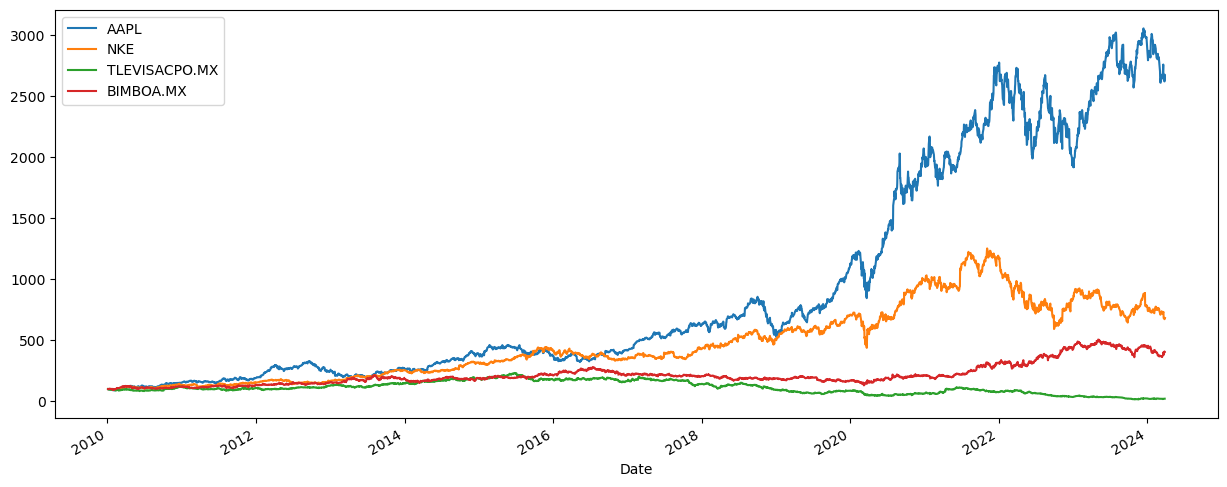

In [45]:
(mydata / mydata.iloc[0]*100).plot(figsize=(15,6))
plt.show() #Divide cada elemtnos de los datos entre el primer dato, es decir, porcentaje relativo al inicial valor

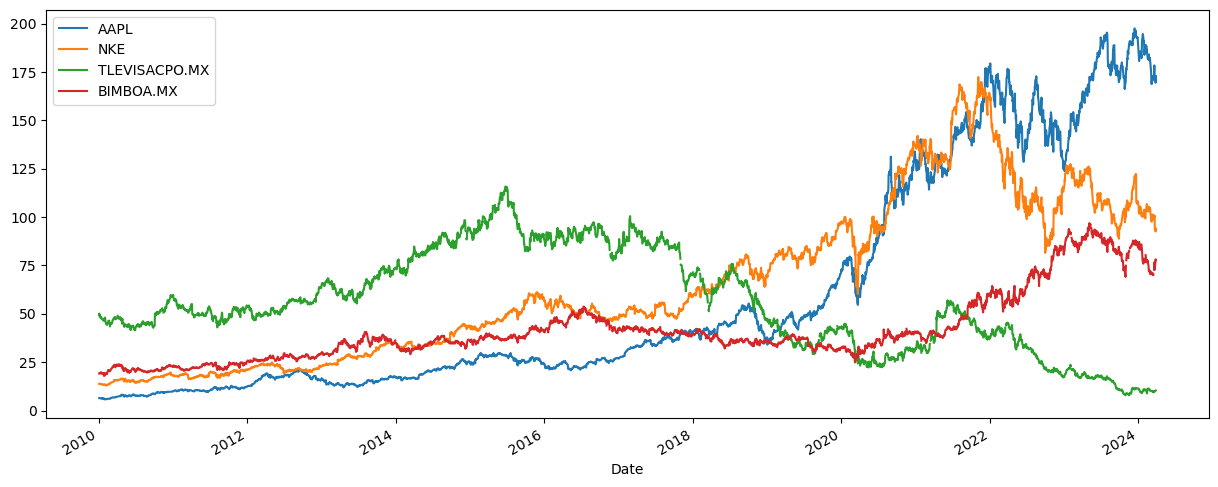

In [46]:
mydata.plot(figsize=(15,6))
plt.show() #Grafica los precios de los activos de cada empresa.

In [47]:
mydata.loc['2015-1-06'] #Nos da los datos en la fecha correspondiente.

AAPL             23.716955
NKE              41.987186
TLEVISACPO.MX    91.729652
BIMBOA.MX        35.347992
Name: 2015-01-06 00:00:00, dtype: float64

In [48]:
mydata.iloc[0]

AAPL              6.461977
NKE              13.761756
TLEVISACPO.MX    50.012402
BIMBOA.MX        19.159431
Name: 2010-01-04 00:00:00, dtype: float64

### Calculo de los retornos de un portafolio

In [49]:
returns = (mydata / mydata.shift(1))-1 
returns.head() #Retornos de cada uno de los activos, porcentajes

,AAPL,NKE,TLEVISACPO.MX,BIMBOA.MX
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.003979,-0.013588,0.001138
2010-01-06,-0.015906,-0.006097,-0.009494,-0.001136
2010-01-07,-0.001849,0.009814,0.015786,0.006712
2010-01-08,0.006648,-0.001974,-0.022942,-0.005537


In [50]:
weights = np.array([0.25, 0.25, 0.25, 0.25]) #Peso del portafolio

In [51]:
weights

array([0.25, 0.25, 0.25, 0.25])

\begin{equation*}
\text{np.dot(returns, weights)} = (r_1 \times w_1) + (r_2 \times w_2) + (r_3 \times w_3) + (r_4 \times w_4)
\end{equation*}


In [52]:
np.dot(returns,weights)

array([        nan, -0.00168568, -0.00815837, ...,  0.00198743,
        0.00839397,         nan])

In [53]:
annual_returns= returns.mean()*250 #Retorno para un año 
annual_returns 


annual_returns= returns.mean()*250 #Retorno para un año 
annual_returns 

AAPL             0.268011
NKE              0.171598
TLEVISACPO.MX   -0.082196
BIMBOA.MX        0.118634
dtype: float64

In [54]:
np.dot(annual_returns, weights)

0.11901167460032022

In [60]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5)* 100) + '%' 
print(pfolio_1) #Creación del portafolio 1, round redondea a 5 deciamles 

#Es el rendimiento esperado.

11.901%


In [61]:
weights_2= np.array([0.4, 0.4, 0.15, 0.05])

In [62]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5)* 100) + '%' 
print(pfolio_1) #Creación del portafolio 2
print(pfolio_2)

11.901%
16.945%


 ## Optimización de los pesos por medio de Monte Carlo.

In [63]:
import numpy as np

#Sea x = W_APPL; y = W_NKE; z = W_TLEVISACPO.MX; w = W_BIMBOA.MX 
# Definimos la función objetivo
def objetivo(x, y, z, w):
    return 0.268011*x + 0.171598*y - 0.082196*z + 0.118634*w

# Número de iteraciones para la simulación
num_iteraciones = 1000000

# Variables para almacenar el valor máximo encontrado y las correspondientes variables x, y, z, w
max_valor = -np.inf #El -infinito de la computadora, el valor mas pequeño.
mejor_x, mejor_y, mejor_z, mejor_w = 0, 0, 0, 0

# Búsqueda aleatoria
for _ in range(num_iteraciones): #El_ es porque la variable sera ignorada, enotnces no importa el valor. 
    # Generar valores aleatorios para x, y, z
    x = np.random.rand()
    y = np.random.rand()
    z = np.random.rand()
    
    # Calcular w para que se cumpla la restricción x + y + z + w = 1
    w = 1 - x - y - z
    
    # Asegurarse de que w sea no negativo
    if w >= 0:
        valor = objetivo(x, y, z, w)
        if valor > max_valor:
            max_valor = valor
            mejor_x, mejor_y, mejor_z, mejor_w = x, y, z, w

# Resultados

weights_optimos = [mejor_x, mejor_y, mejor_z, mejor_w]
print(f"Máximo valor encontrado: {max_valor}")
print(f"Mejores valores: x = {mejor_x}, y = {mejor_y}, z = {mejor_z}, w = {mejor_w}")


Máximo valor encontrado: 0.26588475199653644
Mejores valores: x = 0.9829197781588526, y = 0.013088007422030201, z = 0.0013347056246520994, w = 0.0026575087944651354


## Portafolio Optimo

In [64]:
pfolio_optimo = str(round(np.dot(annual_returns, weights_optimos), 5)* 100) + '%' 
print(pfolio_optimo) 

26.588%


Optimización de los pesos por medio del Método Simplex
\begin{equation*}
\begin{aligned}
\text{Max} & \quad 0.273623 W_{AAPL} + 0.169206W_{NKE} -0.078206 W_{TLEVISACPO.MX} + 0.110403 W_{BIMBOA.MX} \\
\text{s.a.}  & \quad W_{AAPL} + W_{NKE} + W_{TLEVISACPO.MX} + W_{BIMBOA.MX} = 1
\end{aligned}
\end{equation*}


Resolviendo por medio de Simplex-Solver de Excel, obtenemos que:
\begin{equation*}
\begin{aligned}
W_{AAPL} & = 1\\
W_{NKE} &= 0 \\
W_{TLEVISACPO.MX} &= 0 \\
W_{BIMBOA.MX} &= 0 \\
\end{aligned}
\end{equation*}



In [65]:
weights_optimos_simplex = [1,0,0,0]
pfolio_optimo = str(round(np.dot(annual_returns, weights_optimos), 5)* 100) + '%' 
print(pfolio_optimo) 

26.588%


## Optimización por medio de Algorítmo Genético Evolutivo.

In [67]:
import numpy as np

def optimizacion_portafolio(num_var, tam_pob, iteraciones):
    def f(x):
        return 0.268011 * x[0] + 0.171598 * x[1] - 0.082196 * x[2] + 0.118634 * x[3]
    
    # Inicialización de la población con la restricción
    poblacion = np.random.rand(tam_pob, num_var)
    poblacion = poblacion / poblacion.sum(axis=1, keepdims=True)  # Normaliza cada fila para que sume 1
    
    tasa_mutacion = 0.1

    for _ in range(iteraciones):  # Iteraciones del algoritmo genético 
        mat_evaluaciones = np.array([f(individuo) for individuo in poblacion])
        seleccionados = seleccion(poblacion, mat_evaluaciones)  # Selección
        descendientes = reproduccion(seleccionados, num_var)  # Reproducción
        descendientes_mutados = mutacion(descendientes, tasa_mutacion, num_var)  # Mutación
        mat_evaluaciones = np.array([f(individuo) for individuo in descendientes_mutados])
        poblacion = descendientes_mutados  # Nueva población

    # Solución encontrada
    result = np.max(mat_evaluaciones)
    indice_result = np.argmax(mat_evaluaciones)
    vec = poblacion[indice_result, :]
    print('\nResultados del método del algoritmo genético')
    print('El vector óptimo encontrado es:')
    print('Vector=[', ',  '.join(map(str, vec)), ']')
    print('Evaluación:', result)

def seleccion(poblacion, mat_evaluaciones):
    tam_pob = poblacion.shape[0]
    seleccionados = np.zeros_like(poblacion)
    
    for i in range(tam_pob):
        p1, p2 = np.random.randint(tam_pob, size=2)
        r1, r2 = np.random.randint(tam_pob, size=2)
        maxp = max(mat_evaluaciones[p1], mat_evaluaciones[p2])
        maxr = max(mat_evaluaciones[r1], mat_evaluaciones[r2])
        if maxp >= maxr:
            indicep = np.where(mat_evaluaciones == maxp)[0]
            if indicep.size > 0:
                seleccionados[i, :] = poblacion[indicep[0], :]
        else:
            indicer = np.where(mat_evaluaciones == maxr)[0]
            if indicer.size > 0:
                seleccionados[i, :] = poblacion[indicer[0], :]
    
    return seleccionados

def reproduccion(seleccionados, num_variables):
    descendientes = np.zeros_like(seleccionados)
    tam_pob = seleccionados.shape[0]
    
    for i in range(0, tam_pob, 2):
        padre1, padre2 = seleccionados[i, :], seleccionados[i + 1, :]
        punto_corte = np.random.randint(1, num_variables)
        descendientes[i, :] = np.concatenate((padre1[:punto_corte], padre2[punto_corte:]))
        descendientes[i + 1, :] = np.concatenate((padre2[:punto_corte], padre1[punto_corte:]))
    
    return descendientes

def mutacion(descendientes, tasa_mutacion, num_variables):
    tam_pob = descendientes.shape[0]
    for i in range(tam_pob):
        for j in range(num_variables):
            if np.random.rand() < tasa_mutacion:
                descendientes[i, j] += -1 + 2 * np.random.rand()  # Número random entre [-1, 1]
        descendientes[i, :] = np.clip(descendientes[i, :], 0, None)  # Asegura que los valores sean no negativos
        suma = descendientes[i, :].sum()
        if suma > 0:
            descendientes[i, :] /= suma  # Normaliza para que sumen 1
    
    return descendientes

num_var = 4
tam_pob = 1000
iteraciones = 1000
optimizacion_portafolio(num_var, tam_pob, iteraciones)



Resultados del método del algoritmo genético
El vector óptimo encontrado es:
Vector=[ 1.0,  0.0,  0.0,  0.0 ]
Evaluación: 0.268011
